## Content

1. Loading and Visualizing data
2. Using model from library
3. Plotting the result
4. Making prediction on new data

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

## 1. Loading and Visualizing data

In [21]:
# The data is from Coursera Machine Learning course/week2/ex2data2.txt
data = np.loadtxt('../data/data2.txt', delimiter = ',')

n = data.shape[1] - 1  # Number of features

X = data[:, 0:n]            # Size of house and number of bedrooms
Y = data[:, n, np.newaxis]  # Price of the house

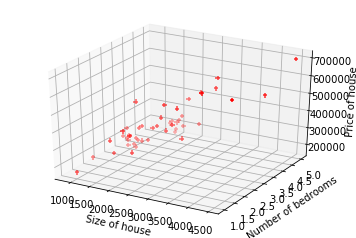

In [22]:
# Visualize the data (since we know n = 2, so it's drawable)
figureId = 1

def plotData(X, Y):
    global figureId
    fig = plt.figure(figureId)
    fig.canvas.set_window_title('Data visualization before Feature Normalization')
    ax = fig.gca(projection = '3d')
    ax.scatter(X[:, 0, np.newaxis],
               X[:, 1, np.newaxis], 
               Y,
               color = 'red', 
               marker = '+')
    ax.set_xlabel('Size of house')
    ax.set_ylabel('Number of bedrooms')
    ax.set_zlabel('Price of house')
    plt.draw()
    
    figureId += 1
    return ax

plotData(X, Y)
plt.show()

## 2. Using model from library

In [23]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Training 
regr.fit(X, Y)

# The coefficients
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  [ 89597.9095428]
Coefficients:  [[  139.21067402 -8738.01911233]]


## 3. Plotting the result

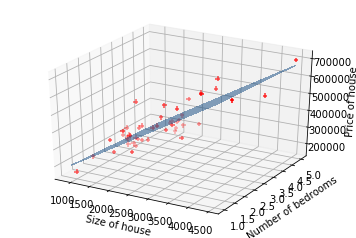

In [29]:
ax = plotData(X, Y)

# Plot the separating hyperlane
X1_grid = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
X2_grid = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
X1_grid, X2_grid = np.meshgrid(X1_grid, X2_grid)
Y_grid = regr.intercept_ + regr.coef_[0][0] * X1_grid + regr.coef_[0][1] * X2_grid
ax.plot_surface(X1_grid, X2_grid, Y_grid, 
               linewidth = 0, 
               antialiased = False,
               color = (0.118, 0.565, 1.000, 0.5))
plt.show()


## 4. Making prediction on new data

In [32]:
X1 = 2350  # Size of house
X2 = 3     # Number of bedrooms
Y_pred = regr.intercept_ + regr.coef_[0][0] * X1 + regr.coef_[0][1] * X2
print('The price of house with size %.2f and %d bedroom(s) is %.3f' % (X1, X2, Y_pred))


The price of house with size 2350.00 and 3 bedroom(s) is 390528.936
